# Election AD Campaign Data Analysis

**Importing Data and Data Glance**

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Define the paths to your CSV files
file_paths = {
    'results': 'results.csv',
    'advertisers': 'advertisers.csv',
    'locations': 'locations.csv'
}

# Read all CSV files into DataFrames in one line
data = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Access the DataFrames
results = data['results']
advertisers = data['advertisers']
locations = data['locations']

# Display the first few rows of the results DataFrame
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


**Data Glance**

In [66]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [67]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [68]:
results.shape

(550, 8)

In [69]:
results.iloc[549]

_id                         550
Sl No                       NaN
State                       NaN
PC_Name           Phase 7 Total
Total Electors        100653884
Polled (%)                63.88
Total Votes            64296221
Phase                       NaN
Name: 549, dtype: object

In [70]:
advertisers.shape

(20832, 5)

In [71]:
locations.shape

(36, 2)

## Merging the Datasets according to our requirement

Merging the results and locations Dataframe

In [72]:
results['State_normalized'] = results['State'].str.replace('&', 'and', regex=False)
locations['Location name_normalized'] = locations['Location name'].str.replace('&', 'and', regex=False)

# Perform merge based on normalized columns
merged_data = results.merge(locations, left_on='State_normalized', right_on='Location name_normalized', how='left')

# Drop the normalized columns if not needed in the final output
merged_data = merged_data.drop(['State_normalized', 'Location name_normalized'], axis=1)

merged_data

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,Andaman and Nicobar Islands,377858.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0,Arunachal Pradesh,1385654.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0,Arunachal Pradesh,1385654.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0,Assam,17478091.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0,Assam,17478091.0
...,...,...,...,...,...,...,...,...,...,...
545,546,54.0,West Bengal,Joynagar,1844780,80.08,1477298,NaN,West Bengal,77244996.0
546,547,55.0,West Bengal,Kolkata Dakshin,1849520,66.95,1238256,NaN,West Bengal,77244996.0
547,548,56.0,West Bengal,Kolkata Uttar,1505356,63.59,957319,NaN,West Bengal,77244996.0
548,549,57.0,West Bengal,Mathurapur,1817068,82.02,1490299,NaN,West Bengal,77244996.0


In [73]:
merged_data.shape

(550, 10)

In [74]:
merged_data.loc[549]

_id                             550
Sl No                           NaN
State                           NaN
PC_Name               Phase 7 Total
Total Electors            100653884
Polled (%)                    63.88
Total Votes                64296221
Phase                           NaN
Location name                   NaN
Amount spent (INR)              NaN
Name: 549, dtype: object

In [75]:
results['State'].head(550)

0      Andaman & Nicobar Islands
1              Arunachal Pradesh
2              Arunachal Pradesh
3                          Assam
4                          Assam
                 ...            
545                  West Bengal
546                  West Bengal
547                  West Bengal
548                  West Bengal
549                          NaN
Name: State, Length: 550, dtype: object

## Visualizing the Total Ad Spend by a State ##

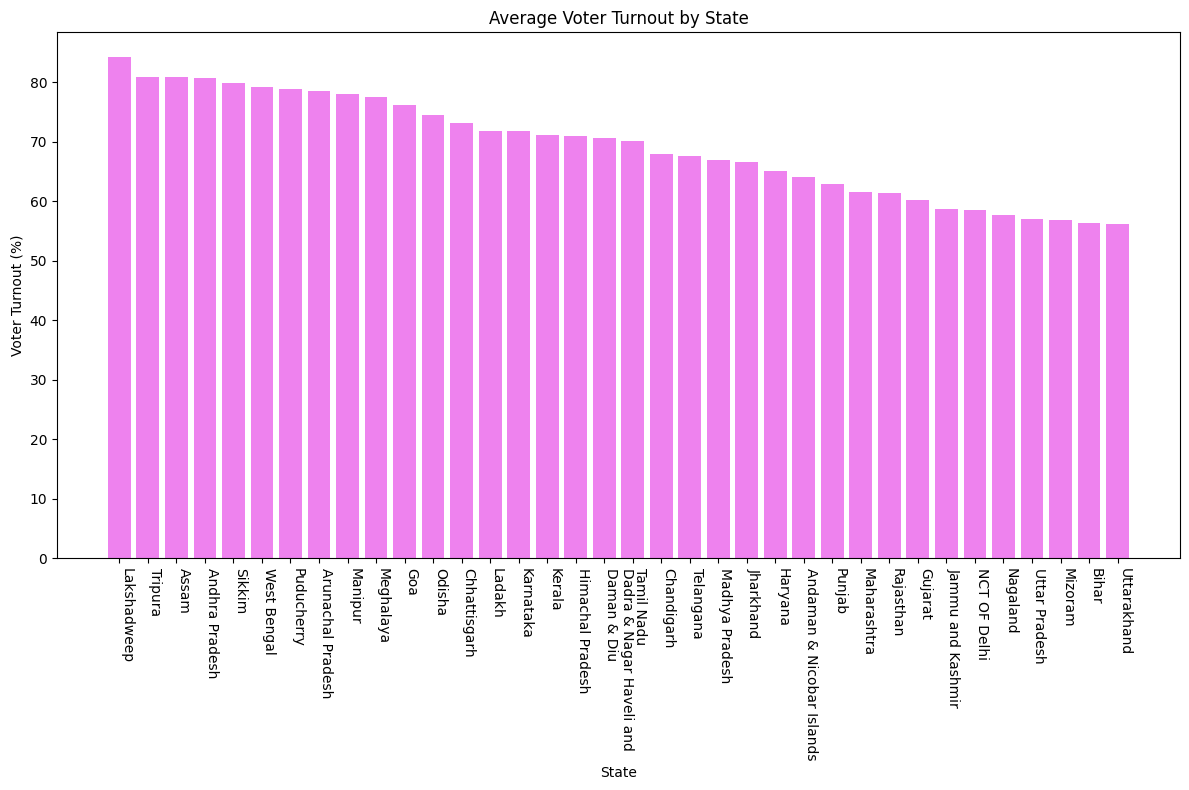

In [76]:
state_ad_spend = merged_data.groupby('State')['Polled (%)'].mean().reset_index()

# Sort dataframe by 'Polled (%)' in descending order
state_ad_spend = state_ad_spend.sort_values(by='Polled (%)', ascending=False)


# Plotting with Matplotlib
plt.figure(figsize=(12, 8))  # Adjust size as necessary
bars = plt.bar(state_ad_spend['State'], state_ad_spend['Polled (%)'], color='violet')

plt.xlabel('State')
plt.ylabel('Voter Turnout (%)')
plt.title('Average Voter Turnout by State')

# Customize x-axis labels
plt.xticks(rotation=-90, ha='left')  # Rotate labels for better readability

# Show plot
plt.tight_layout()  # Ensures labels fit within the figure area
plt.show()

## Visualizing the top 5 parties by ad spent ##

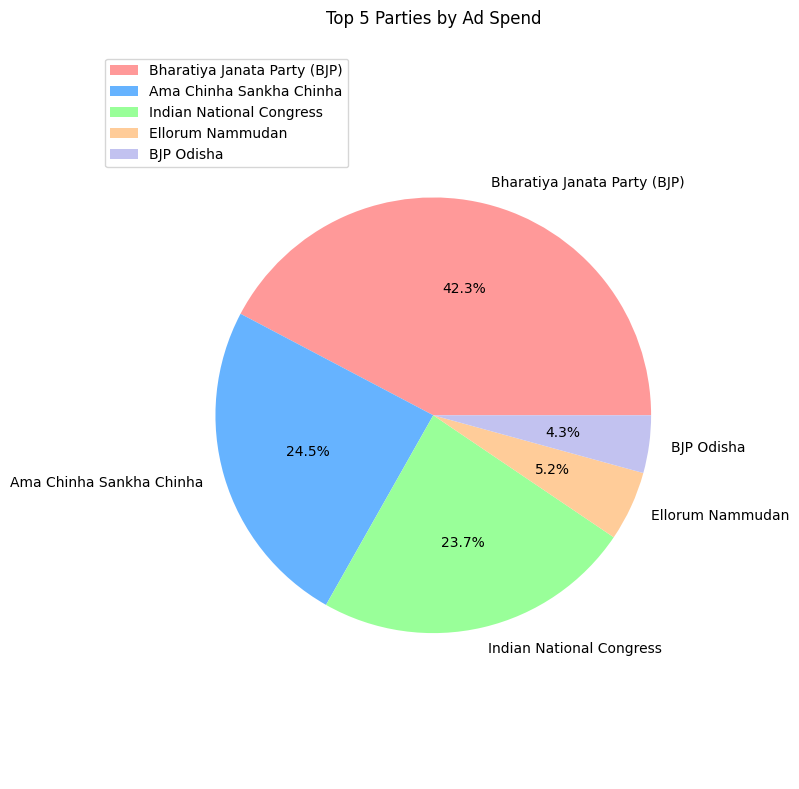

In [77]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')

advertisers.dropna(subset=['Amount spent (INR)'], inplace=True)

party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)

top_5_parties = party_ad_spend.head(5).reset_index()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Plotting with Matplotlib
plt.figure(figsize=(8, 8))  # Adjust size as necessary

# Create pie chart
# autopct='%1.1f%%' displays the percentage values with one decimal place.
plt.pie(top_5_parties['Amount spent (INR)'], labels=top_5_parties['Page name'], colors=colors, autopct='%1.1f%%')

# Title and legend
plt.title('Top 5 Parties by Ad Spend', pad=20)  # pad adjusts the distance from the top of the figure

# Legend customization
# bbox_to_anchor=(-0.1, 1) adjusts the position relative to the plot.
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()


### Finding Correlation between Amount

Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python.

In [78]:
# calculating the correlation between ad spend and voter turnout
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.009803
Polled (%)                   -0.009803    1.000000


The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.010688. This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

### Finding the relationship between ad spend and voter turnout by parliamentary constituency

In [79]:
merged_constituency_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)


In [80]:
merged_constituency_data 

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,State_normalized,Location name,Amount spent (INR),Location name_normalized
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,Andaman and Nicobar Islands,NaN,NaN,NaN
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0,Arunachal Pradesh,Arunachal Pradesh,1385654.0,Arunachal Pradesh
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0,Arunachal Pradesh,Arunachal Pradesh,1385654.0,Arunachal Pradesh
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0,Assam,Assam,17478091.0,Assam
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0,Assam,Assam,17478091.0,Assam
...,...,...,...,...,...,...,...,...,...,...,...,...
545,546,54.0,West Bengal,Joynagar,1844780,80.08,1477298,NaN,West Bengal,West Bengal,77244996.0,West Bengal
546,547,55.0,West Bengal,Kolkata Dakshin,1849520,66.95,1238256,NaN,West Bengal,West Bengal,77244996.0,West Bengal
547,548,56.0,West Bengal,Kolkata Uttar,1505356,63.59,957319,NaN,West Bengal,West Bengal,77244996.0,West Bengal
548,549,57.0,West Bengal,Mathurapur,1817068,82.02,1490299,NaN,West Bengal,West Bengal,77244996.0,West Bengal


1. ***left_on***='State': This specifies that you want to merge the results DataFrame using the column named 'State'.
2. ***right_on***='Location name': This specifies that you want to merge the locations DataFrame using the column named 'Location name'.
3. ***how='left'***: This specifies the type of join. A 'left' join means that all rows from the results DataFrame will be included in the resulting DataFrame, and only matching rows from the locations DataFrame will be included. If there is no match, the result will contain NaN for columns from the locations DataFrame.

#### Creating Scatter plot 'AD Spend (INR)' & Polled (%)

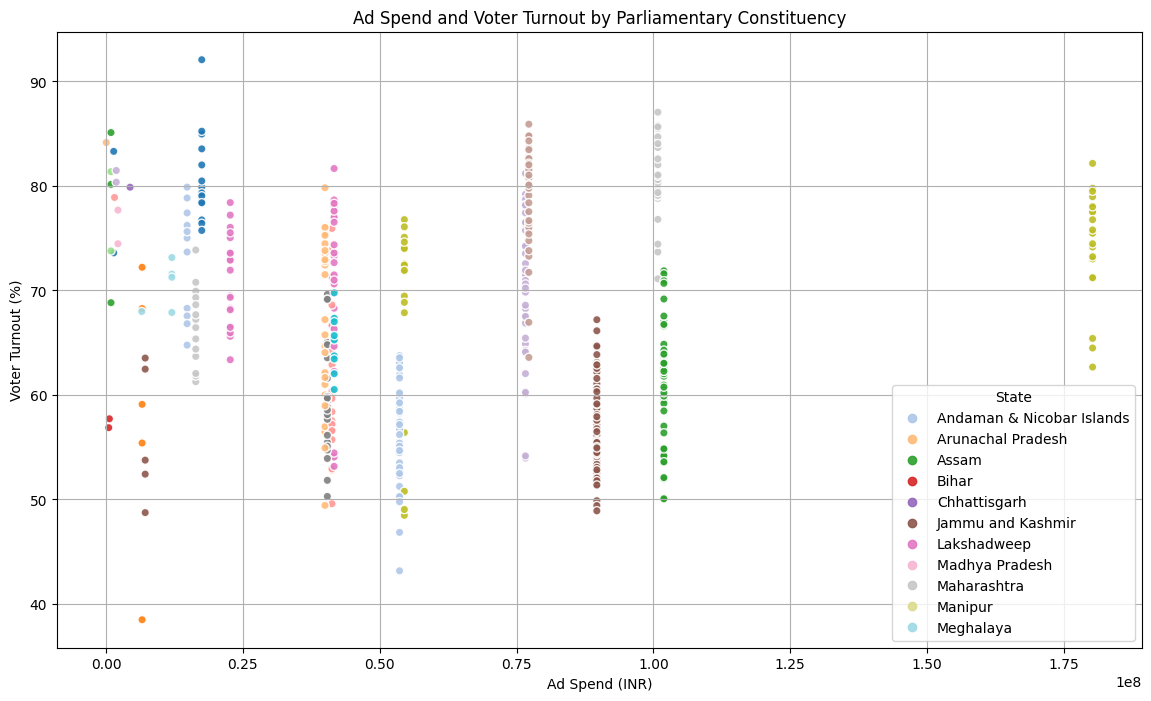

In [81]:
# Create the scatter plot
plt.figure(figsize=(14, 8))

# Scatter plot with color coding by State
scatter = plt.scatter(
    merged_constituency_data['Amount spent (INR)'], 
    merged_constituency_data['Polled (%)'], 
    c=pd.factorize(merged_constituency_data['State'])[0], 
    # 1) pd.factorize() converts the categorical 'State' values into numeric codes. 
    # 2) The [0] extracts these numeric codes (the factorized labels) to use as the color values for the scatter plot.
    cmap='tab20',  # Use a colormap suitable for categorical data
    alpha=0.9, # Adjusts the transparency of the scatter plot points. 0.7 means the points are 70% opaque., 
    edgecolors='w' # Sets the color of the edge of the scatter plot points to white ('w'), which can help the points stand out more clearly.
)

# Create a legend
handles, labels = scatter.legend_elements(prop="colors", alpha=0.9)
plt.legend(handles, merged_constituency_data['State'].unique(), title='State')

# Add labels and title
plt.xlabel('Ad Spend (INR)')
plt.ylabel('Voter Turnout (%)')
plt.title('Ad Spend and Voter Turnout by Parliamentary Constituency')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

It shows that higher ad spending does not necessarily correlate with higher voter turnout. 

### Analyze ad spending and voter turnout by election phase:

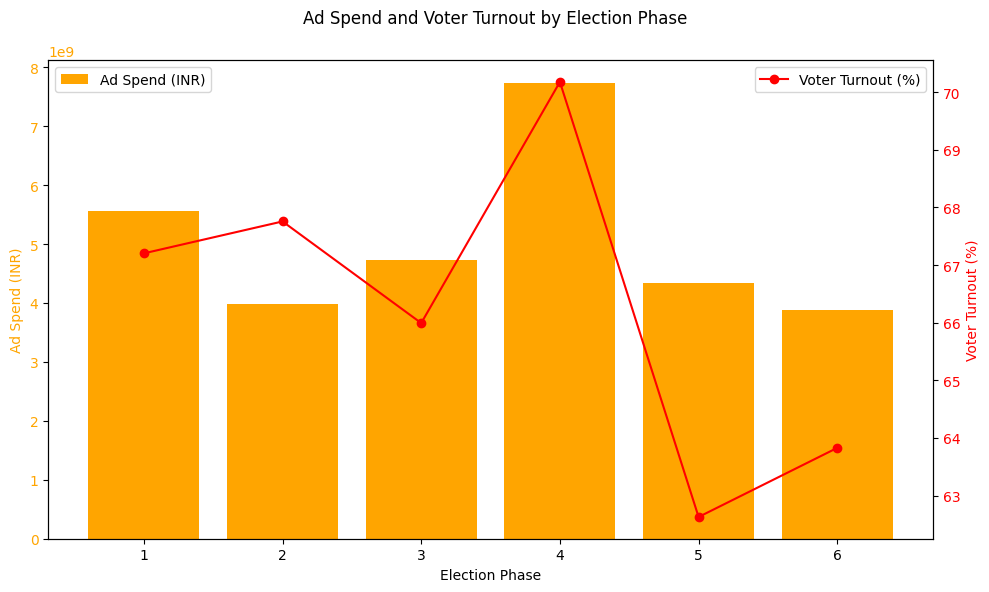

In [82]:
phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar chart for Ad Spend (INR)
color = 'orange'
ax1.bar(phase_analysis['Phase'], phase_analysis['Amount spent (INR)'], color=color, label='Ad Spend (INR)')
ax1.set_xlabel('Election Phase')
ax1.set_ylabel('Ad Spend (INR)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Voter Turnout (%)
ax2 = ax1.twinx() #Use twinx to create a secondary y-axis (ax2).
color = 'red'
ax2.plot(phase_analysis['Phase'], phase_analysis['Polled (%)'], color=color, marker='o', label='Voter Turnout (%)')
ax2.set_ylabel('Voter Turnout (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout adjustments
fig.suptitle('Ad Spend and Voter Turnout by Election Phase')
fig.tight_layout()  # Adjust layout to make room for the second y-axis label

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust figure size
fig.set_size_inches(10, 6)

# Show the plot
plt.show()
